# Import Libraries

In [1]:
# Core Libraries for Data Manipulation and Computation
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Warning suppression for clean output
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the Dataset and Define the file path for the dataset
file = "/content/drive/MyDrive/Data Science/S4F AI & GREEN SKILLS/Capstone Project/dataset_original.csv"
data = pd.read_csv(file)

# Basic Data Exploration

In [4]:
data.head() # Display the first few rows of the dataset

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [5]:
data.shape

(1440, 10)

In [6]:
data.info() # Check the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ship_id             1440 non-null   object 
 1   ship_type           1440 non-null   object 
 2   route_id            1440 non-null   object 
 3   month               1440 non-null   object 
 4   distance            1440 non-null   float64
 5   fuel_type           1440 non-null   object 
 6   fuel_consumption    1440 non-null   float64
 7   CO2_emissions       1440 non-null   float64
 8   weather_conditions  1440 non-null   object 
 9   engine_efficiency   1440 non-null   float64
dtypes: float64(4), object(6)
memory usage: 112.6+ KB


In [7]:
data = data.drop(['ship_id', 'route_id'], axis=1) # Drop unnecessary columns

In [8]:
data.isnull().sum() # Check for missing values in the dataset

,0
ship_type,0
month,0
distance,0
fuel_type,0
fuel_consumption,0
CO2_emissions,0
weather_conditions,0
engine_efficiency,0


In [9]:
# Unique Values in Categorical Columns
categorical_columns = ['ship_type', 'fuel_type', 'weather_conditions']
print("Unique Values in Categorical Columns:\n")
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} unique values\n{data[col].unique()}\n")

Unique Values in Categorical Columns:

ship_type: 4 unique values
['Oil Service Boat' 'Fishing Trawler' 'Surfer Boat' 'Tanker Ship']

fuel_type: 2 unique values
['HFO' 'Diesel']

weather_conditions: 3 unique values
['Stormy' 'Moderate' 'Calm']



# Exploratory Data Analysis

In [10]:
# Identify outliers using the IQR method
numerical_columns = ['distance', 'fuel_consumption', 'CO2_emissions', 'engine_efficiency']

for col in numerical_columns:
    Q1 = data[col].quantile(0.25)  # 1st Quartile
    Q3 = data[col].quantile(0.75)  # 3rd Quartile
    IQR = Q3 - Q1  # IQR

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Column: {col}\nOutliers Detected: {len(outliers)}\n")

Column: distance
Outliers Detected: 145

Column: fuel_consumption
Outliers Detected: 226

Column: CO2_emissions
Outliers Detected: 230

Column: engine_efficiency
Outliers Detected: 0



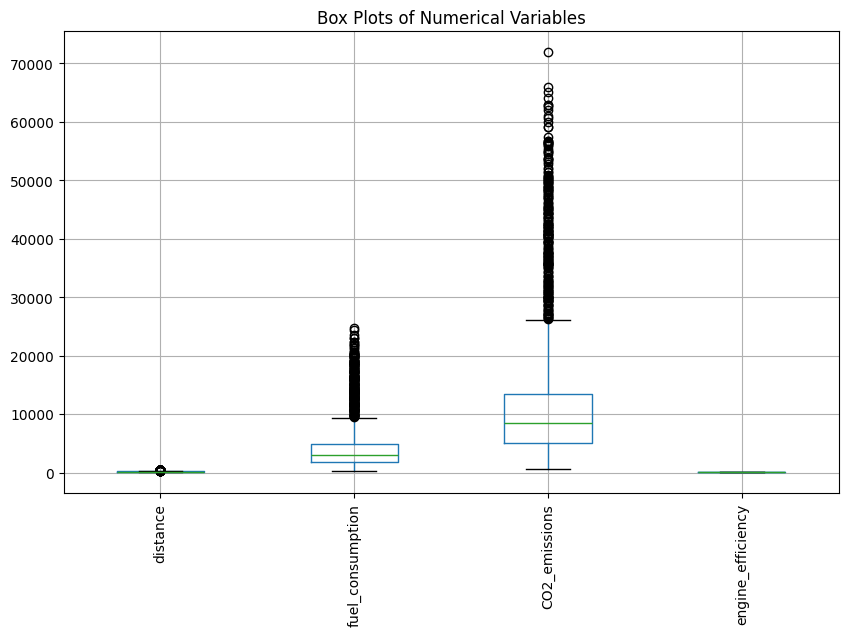

In [11]:
# Visualize numerical columns for anomalies
plt.figure(figsize=(10, 6))
data[numerical_columns].boxplot()
plt.title("Box Plots of Numerical Variables")
plt.xticks(rotation=90)
plt.show()

In [12]:
data[numerical_columns].describe() # Display descriptive statistics

,distance,fuel_consumption,CO2_emissions,engine_efficiency
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,151.753354,4844.246535,13365.454882,82.582924
std,108.472230,4892.352813,13567.650118,7.158289
min,20.080000,237.880000,615.680000,70.010000
25%,79.002500,1837.962500,4991.485000,76.255000
50%,123.465000,3060.880000,8423.255000,82.775000
75%,180.780000,4870.675000,13447.120000,88.862500
max,498.550000,24648.520000,71871.210000,94.980000


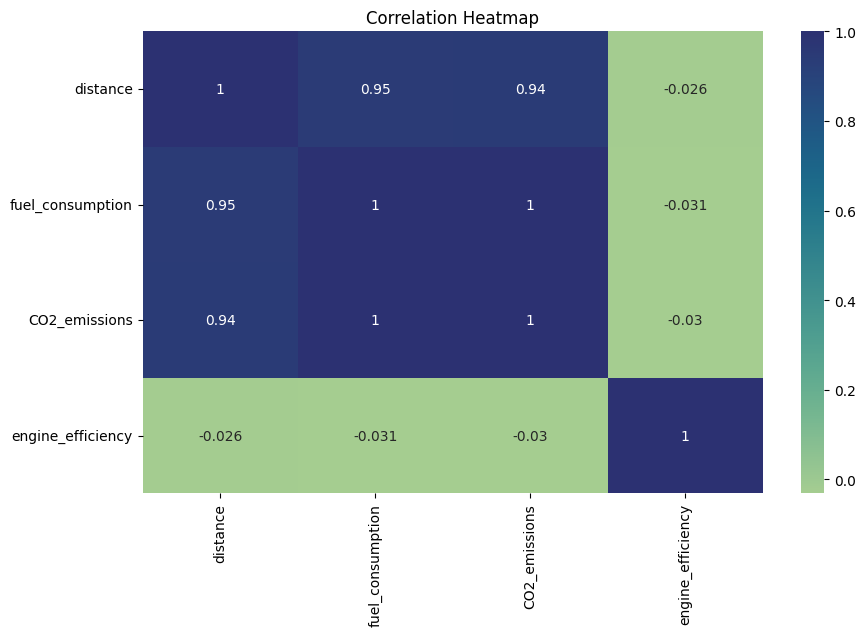

In [13]:
# Correlation Matrix to Check Relationships Between Numerical Features
plt.figure(figsize=(10, 6))  # Set figure size before plotting
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='crest')
plt.title("Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

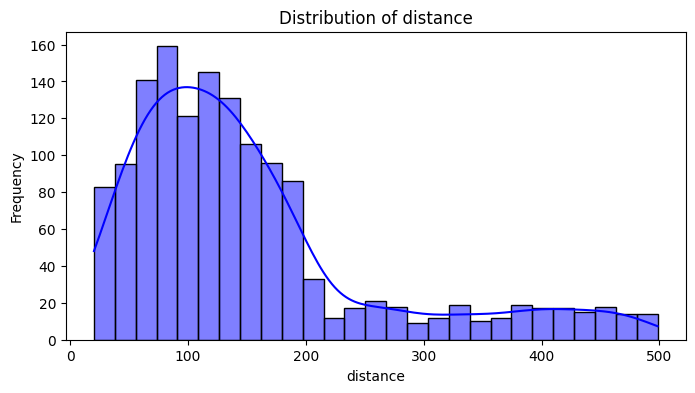

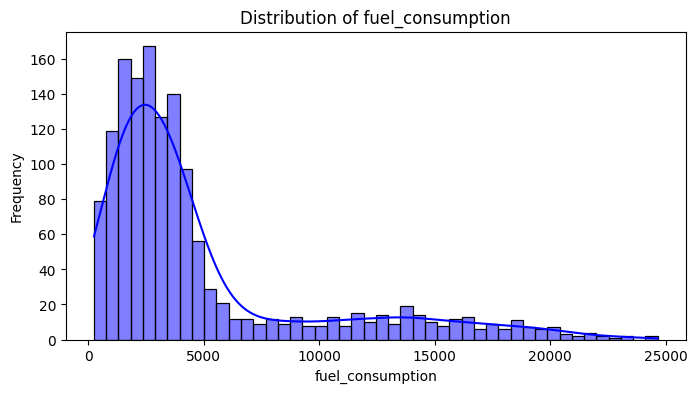

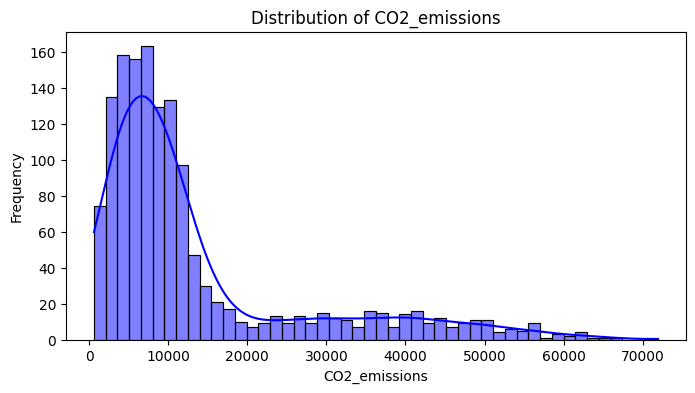

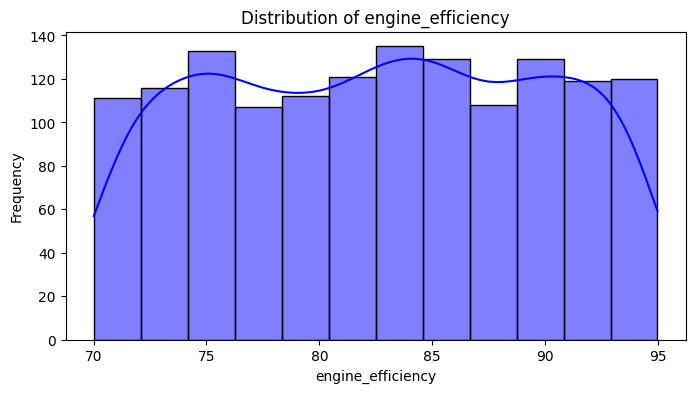

In [14]:
numerical_data = ['distance', 'fuel_consumption', 'CO2_emissions', 'engine_efficiency'] # Convert non-numerical columns to appropriate formats or exclude them from correlation matrix

for col in numerical_data:
    if col in data.columns:
      plt.figure(figsize=(8, 4))
      sns.histplot(data[col], kde=True, color="blue")
      plt.title(f"Distribution of {col}")
      plt.xlabel(col)
      plt.ylabel("Frequency")
      plt.show()

In [15]:
  # Normality Test for Numerical Columns
from scipy.stats import shapiro

for col in numerical_data:
    if col in data.columns:
      stat, p = shapiro(data[col])
      print(f"Shapiro-Wilk Test for {col}:")
      if p > 0.05:
          print(f"P-Value: {p} -> Data appears to be normally distributed.\n")
      else:
          print(f"P-Value: {p} -> Data does not appear to be normally distributed.\n")

Shapiro-Wilk Test for distance:
P-Value: 6.445873549429101e-36 -> Data does not appear to be normally distributed.

Shapiro-Wilk Test for fuel_consumption:
P-Value: 1.035408240414466e-42 -> Data does not appear to be normally distributed.

Shapiro-Wilk Test for CO2_emissions:
P-Value: 1.026859022975988e-42 -> Data does not appear to be normally distributed.

Shapiro-Wilk Test for engine_efficiency:
P-Value: 1.471093633265064e-20 -> Data does not appear to be normally distributed.



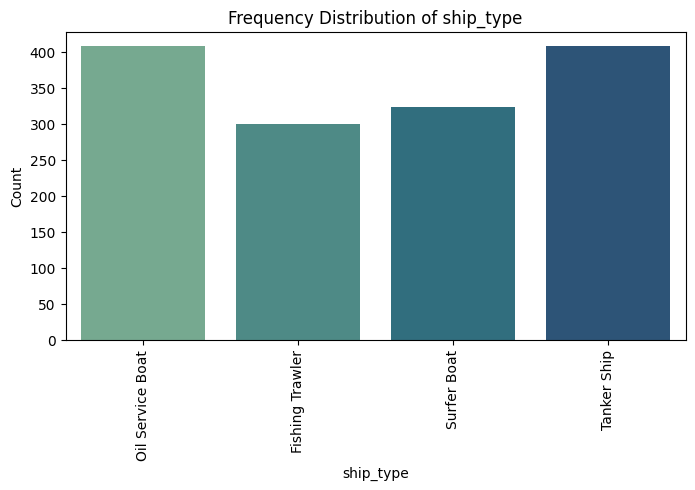

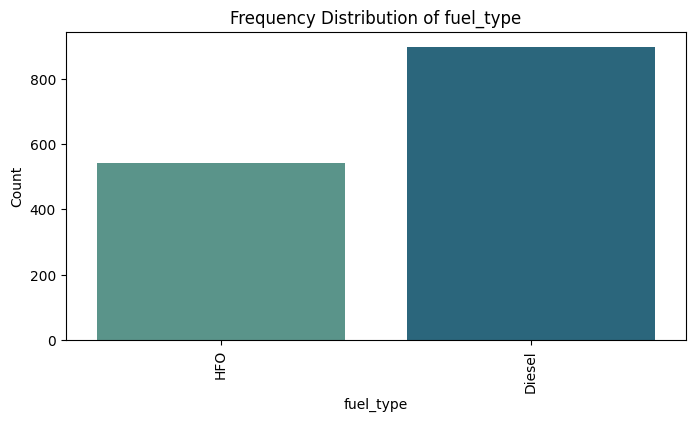

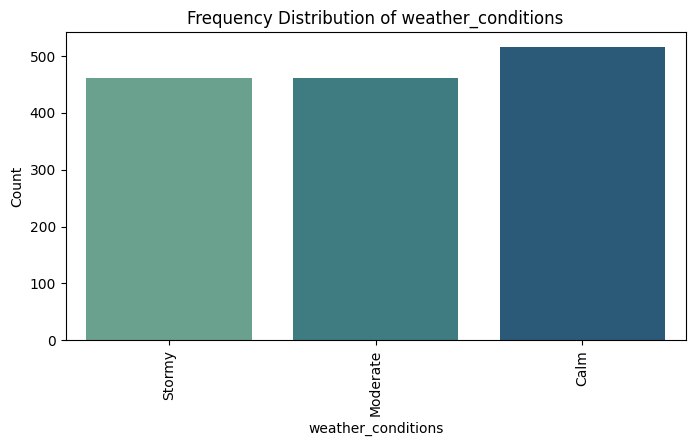

In [16]:
# Frequency Distribution of Categorical Features
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col], palette="crest")
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

In [17]:
# Column-Wise Analysis of Original Dataset
print("Column-Wise Analysis:")
for col in data.columns:
    print(f"\n{col}:")
    print(f" - Data Type: {data[col].dtype}")
    print(f" - Unique Values: {data[col].nunique()}")
    print(f" - Sample Values: {data[col].unique()[:5]}")
    print(f" - Null Values: {data[col].isnull().sum()}")
    if data[col].dtype in ['int64', 'float64']:
        print(f" - Mean: {data[col].mean():.2f}, Std Dev: {data[col].std():.2f}, Min: {data[col].min()}, Max: {data[col].max()}")

Column-Wise Analysis:

ship_type:
 - Data Type: object
 - Unique Values: 4
 - Sample Values: ['Oil Service Boat' 'Fishing Trawler' 'Surfer Boat' 'Tanker Ship']
 - Null Values: 0

month:
 - Data Type: object
 - Unique Values: 12
 - Sample Values: ['January' 'February' 'March' 'April' 'May']
 - Null Values: 0

distance:
 - Data Type: float64
 - Unique Values: 1398
 - Sample Values: [132.26 128.52  67.3   71.68 134.32]
 - Null Values: 0
 - Mean: 151.75, Std Dev: 108.47, Min: 20.08, Max: 498.55

fuel_type:
 - Data Type: object
 - Unique Values: 2
 - Sample Values: ['HFO' 'Diesel']
 - Null Values: 0

fuel_consumption:
 - Data Type: float64
 - Unique Values: 1439
 - Sample Values: [3779.77 4461.44 1867.73 2393.51 4267.19]
 - Null Values: 0
 - Mean: 4844.25, Std Dev: 4892.35, Min: 237.88, Max: 24648.52

CO2_emissions:
 - Data Type: float64
 - Unique Values: 1440
 - Sample Values: [10625.76 12779.73  5353.01  6506.52 11617.03]
 - Null Values: 0
 - Mean: 13365.45, Std Dev: 13567.65, Min: 615.68

In [18]:
# Row-Wise Analysis of Original Dataset
print("Row-Wise Analysis:")

# Display a sample of rows with maximum and minimum values for key numerical columns
key_columns = ['distance', 'fuel_consumption', 'CO2_emissions', 'engine_efficiency']

for col in key_columns:
    print(f"\nRows with Maximum and Minimum Values for {col}:")
    max_row = data.loc[data[col].idxmax()]  # Row with max value
    min_row = data.loc[data[col].idxmin()]  # Row with min value
    print(f"** Row with MAX {col} (Value: {data[col].max()}):\n{max_row}\n")
    print(f"** Row with MIN {col} (Value: {data[col].min()}):\n{min_row}\n")

Row-Wise Analysis:

Rows with Maximum and Minimum Values for distance:
** Row with MAX distance (Value: 498.55):
ship_type             Tanker Ship
month                    February
distance                   498.55
fuel_type                  Diesel
fuel_consumption         22973.21
CO2_emissions            62936.17
weather_conditions         Stormy
engine_efficiency           70.49
Name: 793, dtype: object

** Row with MIN distance (Value: 20.08):
ship_type             Oil Service Boat
month                         February
distance                         20.08
fuel_type                       Diesel
fuel_consumption                652.41
CO2_emissions                  1936.77
weather_conditions            Moderate
engine_efficiency                87.22
Name: 1033, dtype: object


Rows with Maximum and Minimum Values for fuel_consumption:
** Row with MAX fuel_consumption (Value: 24648.52):
ship_type             Tanker Ship
month                    December
distance                   49

In [19]:
# Duplicate Rows Check
print("Duplicate Rows Check:")
duplicate_count = data.duplicated().sum()
print(f" - Total Duplicate Rows: {duplicate_count}")
if duplicate_count > 0:
    print(" - Displaying Duplicate Rows:")
    print(data[data.duplicated()].head())

Duplicate Rows Check:
 - Total Duplicate Rows: 0


In [20]:
data # Constant Value Columns Check
print("Constant Value Columns Check:")
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
if constant_columns:
    print(f" - Columns with Constant Values: {constant_columns}")
else:
    print(" - No columns with constant values found.")

Constant Value Columns Check:
 - No columns with constant values found.


In [21]:
# Row Integrity: Check for Rows with Extreme Low/High Values in Numerical Columns
print("Row Integrity Check for Extreme Values:")
thresh_low = 0.05  # 5% threshold for low values
thresh_high = 0.95  # 95% threshold for high values

for col in key_columns:
    low_value_threshold = data[col].quantile(thresh_low)
    high_value_threshold = data[col].quantile(thresh_high)
    print(f"\nColumn: {col}")
    print(f" - Rows below {thresh_low*100}% threshold ({low_value_threshold}): {len(data[data[col] < low_value_threshold])}")
    print(f" - Rows above {thresh_high*100}% threshold ({high_value_threshold}): {len(data[data[col] > high_value_threshold])}")

Row Integrity Check for Extreme Values:

Column: distance
 - Rows below 5.0% threshold (34.579): 72
 - Rows above 95.0% threshold (414.2545): 72

Column: fuel_consumption
 - Rows below 5.0% threshold (734.3405): 72
 - Rows above 95.0% threshold (16501.289499999995): 72

Column: CO2_emissions
 - Rows below 5.0% threshold (2061.8855): 72
 - Rows above 95.0% threshold (45649.300999999985): 72

Column: engine_efficiency
 - Rows below 5.0% threshold (71.33): 70
 - Rows above 95.0% threshold (93.64): 71


In [22]:
# Numerical Consistency Across Key Columns
print("Numerical Consistency Check:")
logical_columns = ['distance', 'fuel_consumption', 'CO2_emissions']

# Check if fuel consumption and CO2 emissions scale logically with distance
inconsistent_rows = data[(data['fuel_consumption'] / data['distance']) < 0.1]
print(f" - Rows where fuel consumption per unit distance is unusually low (<0.1): {len(inconsistent_rows)}")
if not inconsistent_rows.empty:
    print(inconsistent_rows.head())

Numerical Consistency Check:
 - Rows where fuel consumption per unit distance is unusually low (<0.1): 0


In [23]:
# CO2 emissions relative to fuel consumption
inconsistent_emission = data[(data['CO2_emissions'] / data['fuel_consumption']) < 2]
print(f" - Rows where CO2 emissions per fuel unit are unusually low (<2): {len(inconsistent_emission)}")
if not inconsistent_emission.empty:
    print(inconsistent_emission.head())

 - Rows where CO2 emissions per fuel unit are unusually low (<2): 0


In [24]:
# Logical Range Validation for Engine Efficiency
print("Engine Efficiency Logical Range Check:")
invalid_efficiency = data[(data['engine_efficiency'] < 0) | (data['engine_efficiency'] > 100)]
if invalid_efficiency.empty:
    print(" - All engine efficiency values are within the valid range (0-100).")
else:
    print(f" - Rows with invalid engine efficiency values: {len(invalid_efficiency)}")
    print(invalid_efficiency)

Engine Efficiency Logical Range Check:
 - All engine efficiency values are within the valid range (0-100).


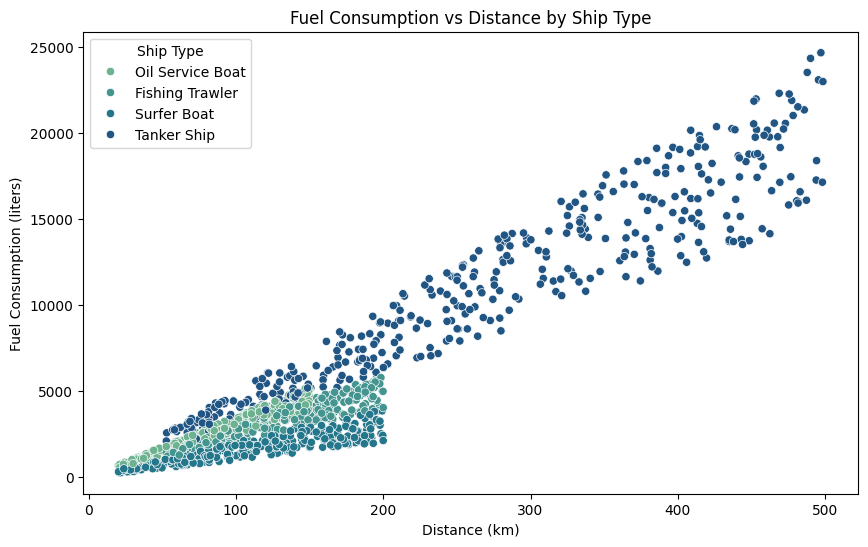

In [25]:
# Fuel Consumption vs Distance (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['distance'], y=data['fuel_consumption'], hue=data['ship_type'], palette="crest")
plt.title("Fuel Consumption vs Distance by Ship Type")
plt.xlabel("Distance (km)")
plt.ylabel("Fuel Consumption (liters)")
plt.legend(title="Ship Type")
plt.show()

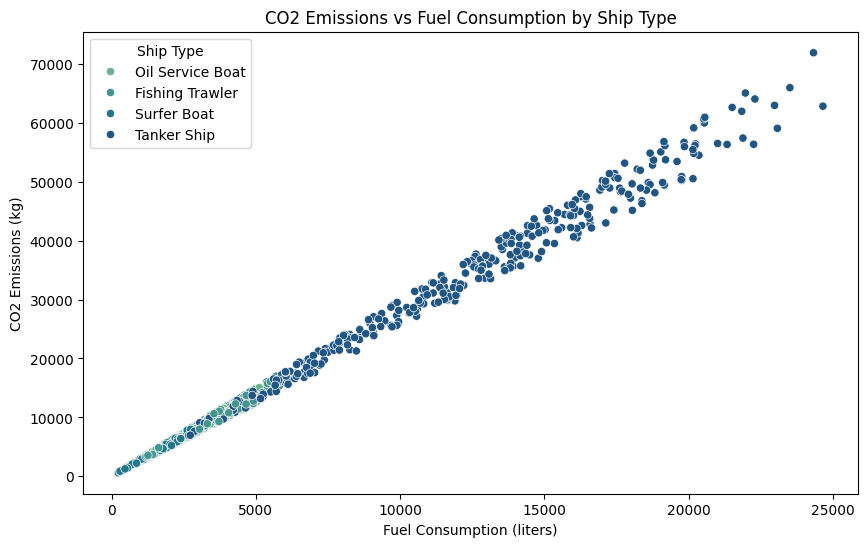

In [26]:
# CO2 Emissions vs Fuel Consumption (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['fuel_consumption'], y=data['CO2_emissions'], hue=data['ship_type'], palette="crest")
plt.title("CO2 Emissions vs Fuel Consumption by Ship Type")
plt.xlabel("Fuel Consumption (liters)")
plt.ylabel("CO2 Emissions (kg)")
plt.legend(title="Ship Type")
plt.show()

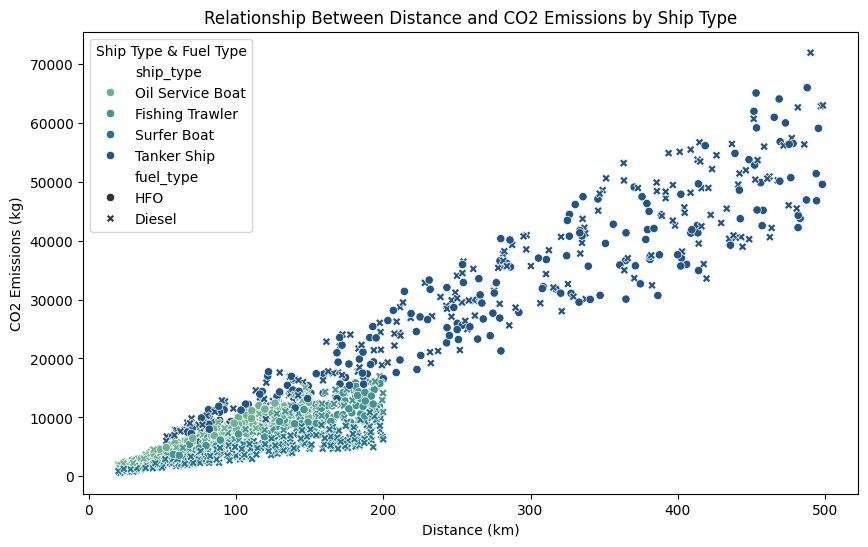

In [27]:
# Relationship Between Distance and CO2 Emissions by Ship Type (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='CO2_emissions', hue='ship_type', style='fuel_type', data=data, palette="crest")
plt.title("Relationship Between Distance and CO2 Emissions by Ship Type")
plt.xlabel("Distance (km)")
plt.ylabel("CO2 Emissions (kg)")
plt.legend(title="Ship Type & Fuel Type")
plt.show()

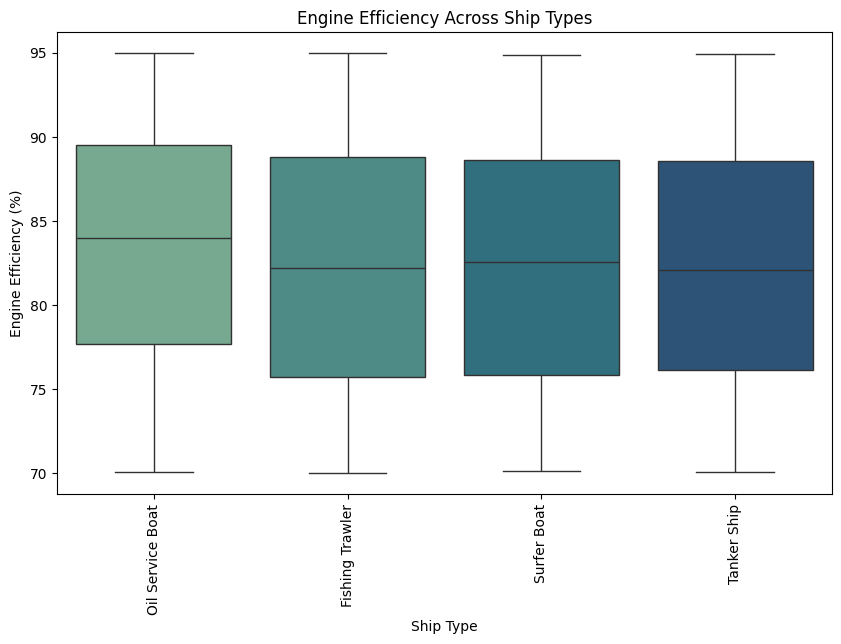

In [28]:
# Engine Efficiency Across Ship Types (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['ship_type'], y=data['engine_efficiency'], palette="crest")
plt.title("Engine Efficiency Across Ship Types")
plt.xlabel("Ship Type")
plt.ylabel("Engine Efficiency (%)")
plt.xticks(rotation=90)
plt.show()

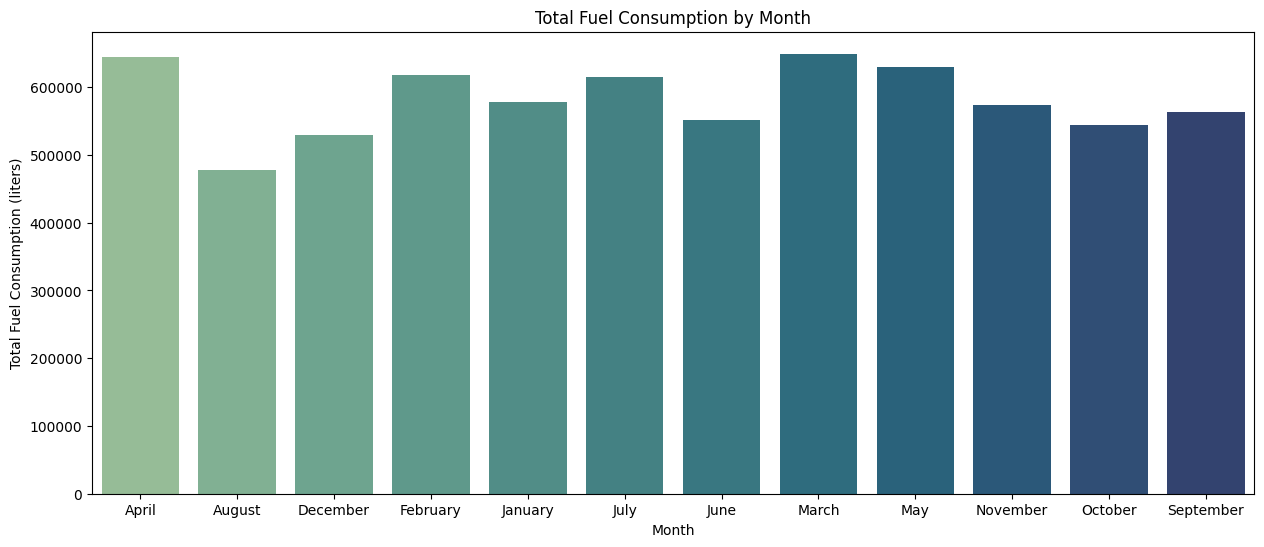

In [29]:
# Monthly Fuel Consumption (Barplot)
monthly_fuel = data.groupby('month')['fuel_consumption'].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x='month', y='fuel_consumption', data=monthly_fuel, palette="crest")
plt.title("Total Fuel Consumption by Month")
plt.xlabel("Month")
plt.ylabel("Total Fuel Consumption (liters)")
plt.show()

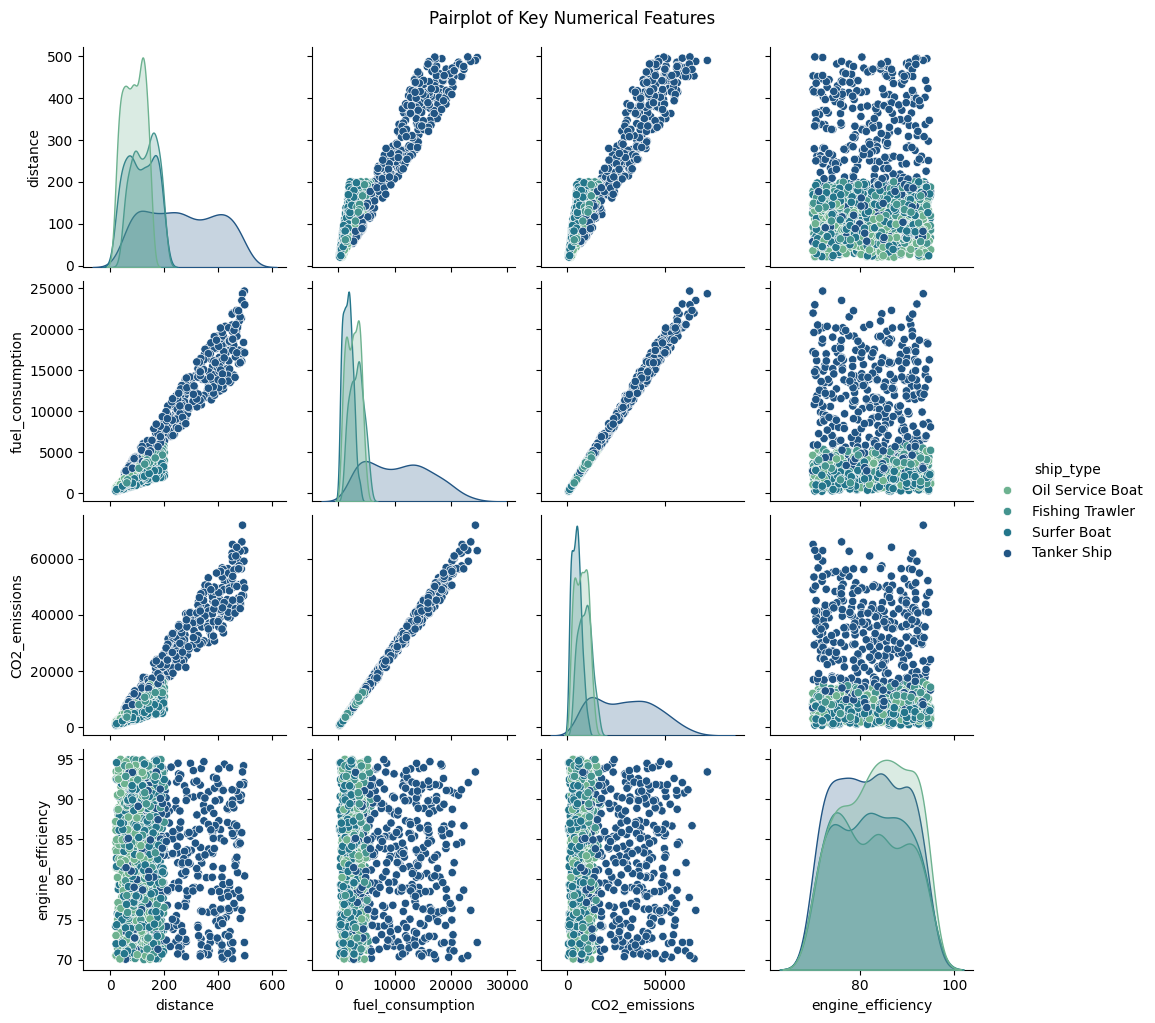

In [30]:
# Pairplot for Numerical Relationships
sns.pairplot(data, hue='ship_type', vars=['distance', 'fuel_consumption', 'CO2_emissions', 'engine_efficiency'], palette="crest")
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()

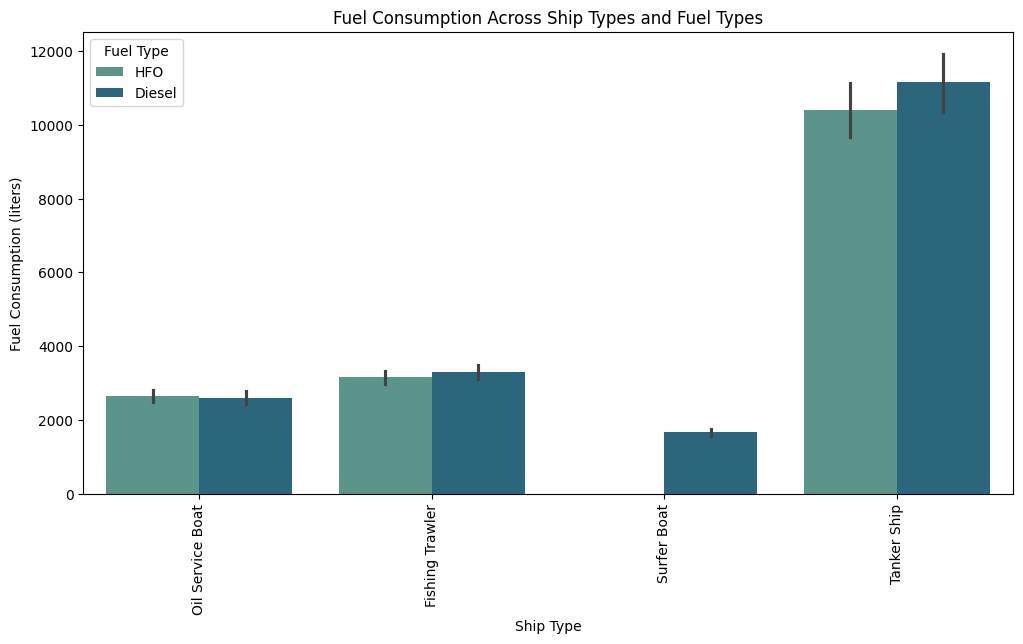

In [31]:
# Fuel Consumption Across Ship Types and Fuel Types (Grouped Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(x='ship_type', y='fuel_consumption', hue='fuel_type', data=data, palette="crest")
plt.title("Fuel Consumption Across Ship Types and Fuel Types")
plt.xlabel("Ship Type")
plt.ylabel("Fuel Consumption (liters)")
plt.xticks(rotation=90)
plt.legend(title="Fuel Type")
plt.show()

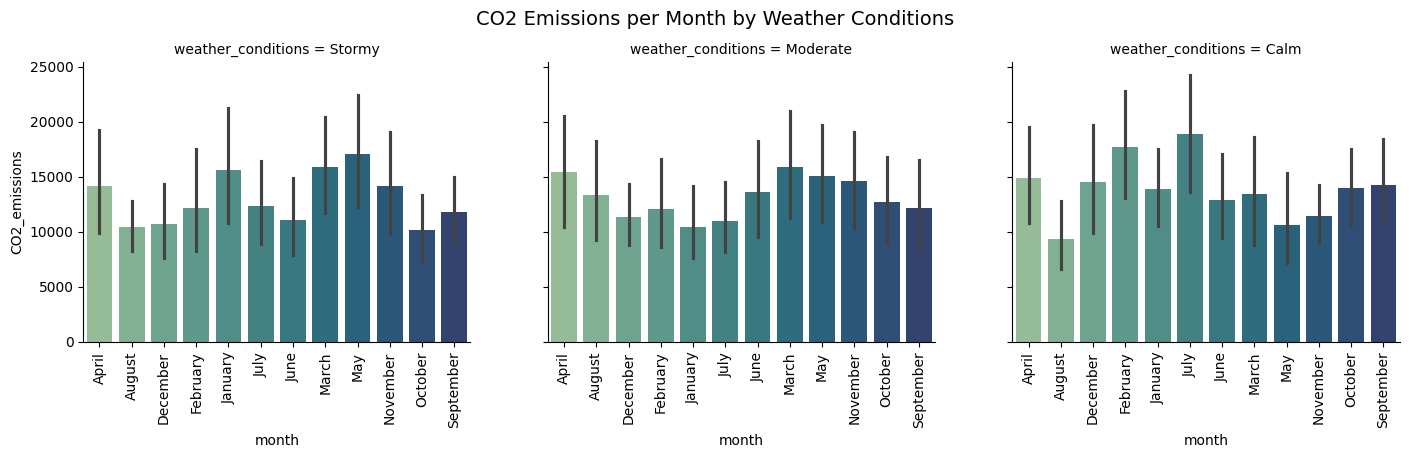

In [32]:
# CO2 Emissions per Month by Weather Conditions (Facet Grid)

# Adjusted and Cleaner Layout for FacetGrid
g = sns.FacetGrid(data, col="weather_conditions", height=4, aspect=1.2)
g.map(sns.barplot, "month", "CO2_emissions", order=sorted(data['month'].unique()), palette="crest")
g.fig.subplots_adjust(top=0.85, bottom=0.15, hspace=0.3, wspace=0.2)
g.set_xticklabels(rotation=90)  # Rotate x-axis labels for better readability
g.fig.suptitle("CO2 Emissions per Month by Weather Conditions", fontsize=14)
plt.show()